# Day 5: Data Manipulation and Analysis
## Notebook 1: Pandas Fundamentals and Data Loading

**Introduction to Scientific Programming**  
CNC-UC | 2025

This notebook covers:
- Pandas core data structures (Series and DataFrame)
- Reading data from CSV and Excel files
- Initial data exploration
- Data selection and indexing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure pandas display options for Jupyter
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)

# For inline plotting
%matplotlib inline

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

Pandas version: 2.3.2
NumPy version: 1.26.4


## 1. Pandas Core Data Structures

### Series: 1D labeled array

In [43]:
# Create a Series from a list
reaction_times = pd.Series([0.523, 0.412, 0.398, 0.501, 0.445])
print("Basic Series:")
print(reaction_times)
print()

# Series with custom index
reaction_times_labeled = pd.Series(
    [0.523, 0.412, 0.398, 0.501, 0.445],
    index=['trial_1', 'trial_2', 'trial_3', 'trial_4', 'trial_5']
)
print("Series with custom index:")
print(reaction_times_labeled)
print()

# Access by position or label
print(f"First element: {reaction_times_labeled.iloc[0]}")
print(f"Trial 3: {reaction_times_labeled['trial_3']}")

Basic Series:
0    0.523
1    0.412
2    0.398
3    0.501
4    0.445
dtype: float64

Series with custom index:
trial_1    0.523
trial_2    0.412
trial_3    0.398
trial_4    0.501
trial_5    0.445
dtype: float64

First element: 0.523
Trial 3: 0.398


In [3]:
# Create DataFrame from dictionary
data = {
    'subject': ['S01', 'S01', 'S02', 'S02', 'S03', 'S03'],
    'condition': ['control', 'drug', 'control', 'drug', 'control', 'drug'],
    'reaction_time': [0.523, 0.412, 0.498, 0.389, 0.556, 0.423],
    'accuracy': [0.85, 0.92, 0.88, 0.95, 0.82, 0.90]
}

df = pd.DataFrame(data)
print("DataFrame from dictionary:")
print(df)
print()

# Access columns
print("Reaction times:")
print(df['reaction_time'])
print()

# Access multiple columns
print("Subject and RT:")
print(df[['subject', 'reaction_time']])

DataFrame from dictionary:
  subject condition  reaction_time  accuracy
0     S01   control          0.523      0.85
1     S01      drug          0.412      0.92
2     S02   control          0.498      0.88
3     S02      drug          0.389      0.95
4     S03   control          0.556      0.82
5     S03      drug          0.423      0.90

Reaction times:
0    0.523
1    0.412
2    0.498
3    0.389
4    0.556
5    0.423
Name: reaction_time, dtype: float64

Subject and RT:
  subject  reaction_time
0     S01          0.523
1     S01          0.412
2     S02          0.498
3     S02          0.389
4     S03          0.556
5     S03          0.423


In [4]:
df

,subject,condition,reaction_time,accuracy
0,S01,control,0.523,0.85
1,S01,drug,0.412,0.92
2,S02,control,0.498,0.88
3,S02,drug,0.389,0.95
4,S03,control,0.556,0.82
5,S03,drug,0.423,0.90


## 2. Reading Data from Files

### Reading CSV files

In [5]:
# Read CSV
df_csv = pd.read_csv('./example_data.csv')
print("Data from CSV:")
df_csv


Data from CSV:


,subject_id,condition,trial,rt,accuracy
0,S01,control,1,523,1
1,S01,control,2,498,1
2,S01,drug,3,412,1
3,S02,control,1,545,0
4,S02,control,2,501,1
5,S02,drug,3,389,1
6,S03,control,1,556,1
7,S03,control,2,534,0
8,S03,drug,3,423,1


In [6]:
# Read with specific parameters
df_csv_custom = pd.read_csv(
    './example_data.csv',
    usecols=['subject_id', 'condition', 'rt'],  # Select columns
    nrows=5  # Read only first 5 rows
)
print("Selective reading:")
df_csv_custom

Selective reading:


,subject_id,condition,rt
0,S01,control,523
1,S01,control,498
2,S01,drug,412
3,S02,control,545
4,S02,control,501


### Reading Excel files

In [10]:
# Read Excel
df_excel = pd.read_excel('gene_expression.xlsx', usecols=[0, 1])
print("\nData from Excel:")
df_excel


Data from Excel:


,gene,control
0,BDNF,100.5
1,TrkB,85.2
2,CREB,120.3
3,Arc,95.8


## 3. Initial Data Exploration

In [14]:
# Create a more substantial dataset for exploration
np.random.seed(42)
n_trials = 100

exploration_data = pd.DataFrame({
    'subject_id': np.repeat(['S01', 'S02', 'S03', 'S04', 'S05'], 20),
    'condition': np.tile(['control', 'drug_A', 'drug_B', 'control', 'drug_A'], 20),
    'trial': np.tile(range(1, 21), 5),
    'reaction_time': np.random.gamma(2, 200, n_trials),
    'accuracy': np.random.binomial(1, 0.85, n_trials),
    'session': np.repeat([1, 2], 50)
})
exploration_data.head()

,subject_id,condition,trial,reaction_time,accuracy,session
0,S01,control,1,478.736,1,1
1,S01,drug_A,2,298.893,1,1
2,S01,drug_B,3,276.457,1,1
3,S01,control,4,276.460,1,1
4,S01,drug_A,5,929.943,1,1


In [20]:
# Essential inspection methods
print("First 5 rows:")
display(exploration_data.head(5))

First 5 rows:


,subject_id,condition,trial,reaction_time,accuracy,session
0,S01,control,1,478.736,1,1
1,S01,drug_A,2,298.893,1,1
2,S01,drug_B,3,276.457,1,1
3,S01,control,4,276.460,1,1
4,S01,drug_A,5,929.943,1,1


In [16]:
print("Last 5 rows:")
exploration_data.tail()

Last 5 rows:


,subject_id,condition,trial,reaction_time,accuracy,session
95,S05,control,16,180.817,0,2
96,S05,drug_A,17,1084.415,1,2
97,S05,drug_B,18,471.255,1,2
98,S05,control,19,139.692,1,2
99,S05,drug_A,20,580.656,1,2


In [17]:
print("Shape (rows, columns):")
print(exploration_data.shape)

Shape (rows, columns):
(100, 6)


In [21]:
print("Column names:")
print(exploration_data.columns.tolist())

Column names:
['subject_id', 'condition', 'trial', 'reaction_time', 'accuracy', 'session']


In [22]:
print("Data types:")
print(exploration_data.dtypes)

Data types:
subject_id        object
condition         object
trial              int64
reaction_time    float64
accuracy           int64
session            int64
dtype: object


In [23]:
print("Detailed info:")
exploration_data.info()

Detailed info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject_id     100 non-null    object 
 1   condition      100 non-null    object 
 2   trial          100 non-null    int64  
 3   reaction_time  100 non-null    float64
 4   accuracy       100 non-null    int64  
 5   session        100 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


In [34]:
print("Summary statistics:")
exploration_data.describe()

Summary statistics:


,trial,reaction_time,accuracy,session
count,100.000,100.000,100.000,100.000
mean,10.500,383.837,0.820,1.500
std,5.795,245.280,0.386,0.503
min,1.000,42.821,0.000,1.000
25%,5.750,217.781,1.000,1.000
50%,10.500,339.494,1.000,1.500
75%,15.250,480.821,1.000,2.000
max,20.000,1459.600,1.000,2.000


### Quick visualizations for exploration

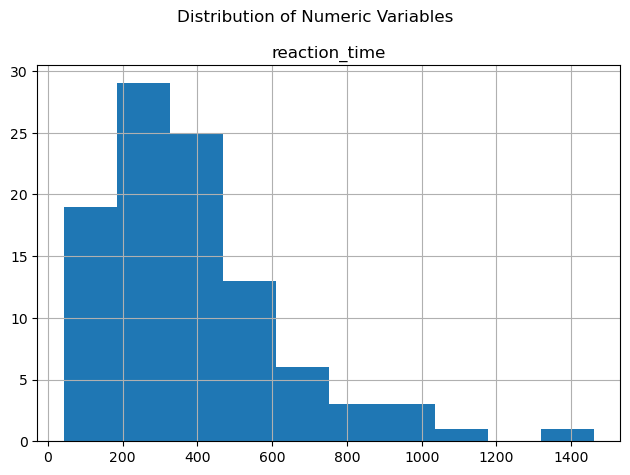

In [37]:
# Histogram of all numeric columns
exploration_data.hist(column='reaction_time')
plt.suptitle('Distribution of Numeric Variables')
plt.tight_layout()
plt.show()

In [42]:
exploration_data.corr(numeric_only=True)

,trial,reaction_time,accuracy,session
trial,1.000,-0.051,0.059,0.173
reaction_time,-0.051,1.000,0.042,0.012
accuracy,0.059,0.042,1.000,0.208
session,0.173,0.012,0.208,1.000


In [24]:
# Value counts for categorical variables
print("Condition counts:")
print(exploration_data['condition'].value_counts())
print("\nSubject counts:")
print(exploration_data['subject_id'].value_counts())

Condition counts:
condition
control    40
drug_A     40
drug_B     20
Name: count, dtype: int64

Subject counts:
subject_id
S01    20
S02    20
S03    20
S04    20
S05    20
Name: count, dtype: int64


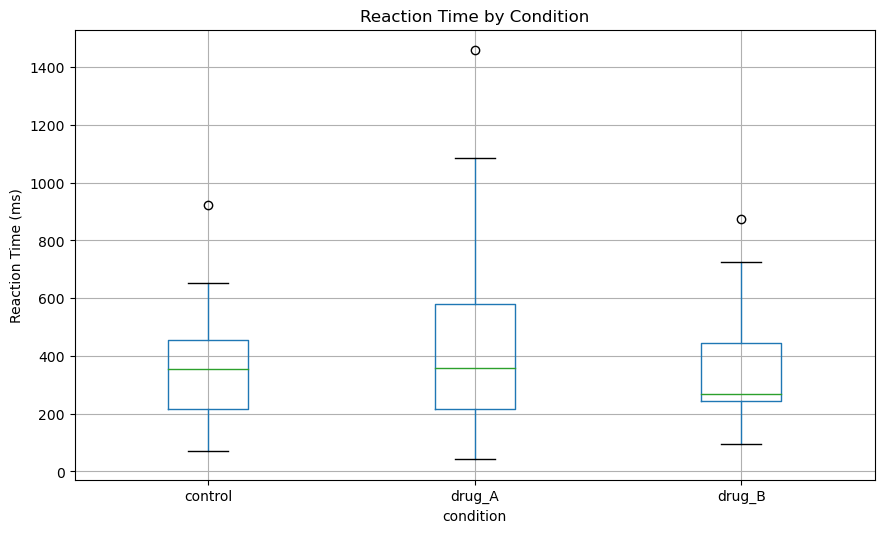

In [25]:
# Box plot
exploration_data.boxplot(column='reaction_time', by='condition', figsize=(10, 6))
plt.title('Reaction Time by Condition')
plt.suptitle('')  # Remove default title
plt.ylabel('Reaction Time (ms)')
plt.show()

## 4. Data Selection Basics

### Selecting columns

In [26]:
# Single column (returns Series)
rt_series = exploration_data['reaction_time']
print("Single column (Series):")
print(type(rt_series))
print(rt_series.head())
print()

# Single column (returns DataFrame)
rt_df = exploration_data[['reaction_time']]
print("Single column (DataFrame):")
print(type(rt_df))
print(rt_df.head())
print()

# Multiple columns
subset = exploration_data[['subject_id', 'condition', 'reaction_time']]
print("Multiple columns:")
print(subset.head())

Single column (Series):
<class 'pandas.core.series.Series'>
0    478.736
1    298.893
2    276.457
3    276.460
4    929.943
Name: reaction_time, dtype: float64

Single column (DataFrame):
<class 'pandas.core.frame.DataFrame'>
   reaction_time
0        478.736
1        298.893
2        276.457
3        276.460
4        929.943

Multiple columns:
  subject_id condition  reaction_time
0        S01   control        478.736
1        S01    drug_A        298.893
2        S01    drug_B        276.457
3        S01   control        276.460
4        S01    drug_A        929.943


### Filtering rows with boolean indexing

In [27]:
# Simple condition
fast_trials = exploration_data[exploration_data['reaction_time'] < 300]
print(f"Trials with RT < 300ms: {len(fast_trials)}")
print(fast_trials.head())
print()

# Multiple conditions with &, |
control_accurate = exploration_data[
    (exploration_data['condition'] == 'control') & 
    (exploration_data['accuracy'] == 1)
]
print(f"Control trials with correct response: {len(control_accurate)}")
print(control_accurate.head())
print()

# Using isin()
drug_trials = exploration_data[
    exploration_data['condition'].isin(['drug_A', 'drug_B'])
]
print(f"Drug trials: {len(drug_trials)}")
print(drug_trials.head())

Trials with RT < 300ms: 45
  subject_id condition  trial  reaction_time  accuracy  session
1        S01    drug_A      2        298.893         1        1
2        S01    drug_B      3        276.457         1        1
3        S01   control      4        276.460         1        1
6        S01    drug_A      7        226.216         1        1
9        S01    drug_A     10         43.183         1        1

Control trials with correct response: 32
   subject_id condition  trial  reaction_time  accuracy  session
0         S01   control      1        478.736         1        1
3         S01   control      4        276.460         1        1
5         S01   control      6        573.341         1        1
13        S01   control     14        278.370         1        1
15        S01   control     16        362.802         1        1

Drug trials: 60
  subject_id condition  trial  reaction_time  accuracy  session
1        S01    drug_A      2        298.893         1        1
2        S01

### .loc[] and .iloc[] - Label vs Position Based Selection

In [28]:
# .loc[] - label-based
print("Using .loc[] (label-based):")
print(exploration_data.loc[0:4, ['subject_id', 'condition', 'reaction_time']])
print()

# .iloc[] - position-based
print("Using .iloc[] (position-based):")
print(exploration_data.iloc[0:5, [0, 1, 3]])  # First 5 rows, columns 0, 1, 3
print()

# Combining .loc[] with boolean indexing
print("Combining .loc[] with conditions:")
fast_control = exploration_data.loc[
    (exploration_data['condition'] == 'control') & 
    (exploration_data['reaction_time'] < 300),
    ['subject_id', 'reaction_time', 'accuracy']
]
fast_control

Using .loc[] (label-based):
  subject_id condition  reaction_time
0        S01   control        478.736
1        S01    drug_A        298.893
2        S01    drug_B        276.457
3        S01   control        276.460
4        S01    drug_A        929.943

Using .iloc[] (position-based):
  subject_id condition  reaction_time
0        S01   control        478.736
1        S01    drug_A        298.893
2        S01    drug_B        276.457
3        S01   control        276.460
4        S01    drug_A        929.943

Combining .loc[] with conditions:


,subject_id,reaction_time,accuracy
3,S01,276.460,1
10,S01,134.248,0
13,S01,278.370,1
28,S02,227.982,1
38,S02,224.287,0
43,S03,192.969,0
48,S03,279.771,1
50,S03,165.126,1
60,S04,85.169,1
70,S04,286.092,1


## Summary

In this notebook we covered:
- Creating Series and DataFrames
- Reading CSV and Excel files
- Essential exploration methods (head, info, describe)
- Basic data selection with [], .loc[], and .iloc[]
- Boolean indexing for filtering

**Next notebook:** Data Cleaning and Transformation